## Analysis of TikTok AI Generated Videos of Trump and Biden

### Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import epitools as epi

In [5]:
# to show the full output

pd.set_option('display.max_colwidth', None)

### Load Data

This is a clean data of TikTok metadata of videos which used the hashtags: aitrump, and aibiden. Each row is a video, and each column is an attribute of the video necessary for this analysis. The raw json file contains 43 attributes but the clean data only examines the following columns: 

* id - An integer value representing the unique identifier for the content.
* uniqueId - user account handle
* signature - user's description of the tiktok page
* followerCount - the number of followers the page contains at the time it was scraped
* aigcLabelType - True/False value which indicates whether or not the video has been labeled as content that uses AI
* createTime - A datetime value representing the time when the content was created
* desc	- description of the video or image including the hashtags used
* playCount	- the number of times the video was played
* shareCount - the number of times the video was shared to other user

In [11]:
df = pd.read_csv('data/sorted.csv')
len(df)

587

## Categorizing the Data


### How many have AI labels?

In [12]:
df['aigcLabelType'].value_counts()

aigcLabelType
False    512
True      74
Name: count, dtype: int64

In [14]:
# create a new column ['categories'] and fill it with gamer == gamer, biden_deepfakes

conditions = [
    (df['gamer'] == 'gamer'),
    (df['biden_deepfakes'] == 'biden_deepfakes'),
    (df['presidential_debates'] == 'presidential_debates'),
    (df['psa_deepfakes'] == 'psa_deepfakes'),
    (df['vietnamese_trump'] == 'vietnamese_trump'),
    (df['trump_covers'] == 'trump_cover'),
    (df['biden_covers'] == 'biden_cover')
]

choices = [
    'gamer',
    'biden_deepfakes',
    'presidential_debates',
    'psa_deepfakes',
    'vietnamese_trump',
    'trump_covers',
    'biden_covers'
]

df['category'] = np.select(conditions, choices, default='unknown')
df['category'].value_counts()
                

category
gamer                   217
unknown                 138
trump_covers             79
biden_deepfakes          57
presidential_debates     41
psa_deepfakes            28
biden_covers             15
vietnamese_trump         12
Name: count, dtype: int64

<Axes: ylabel='category'>

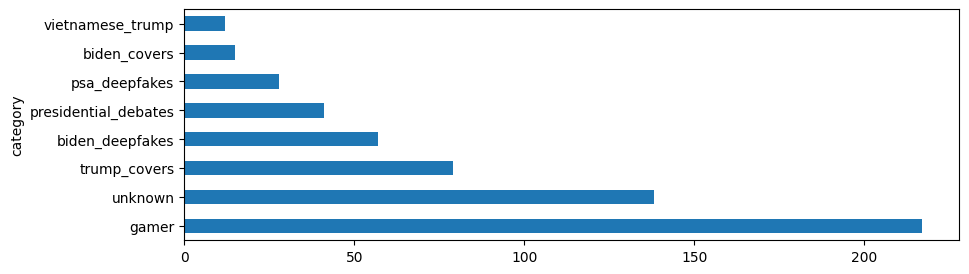

In [15]:
df['category'].value_counts().plot(kind='barh', figsize=(10,3))

## Analyzing Data

### Gamers

<Axes: ylabel='gamer'>

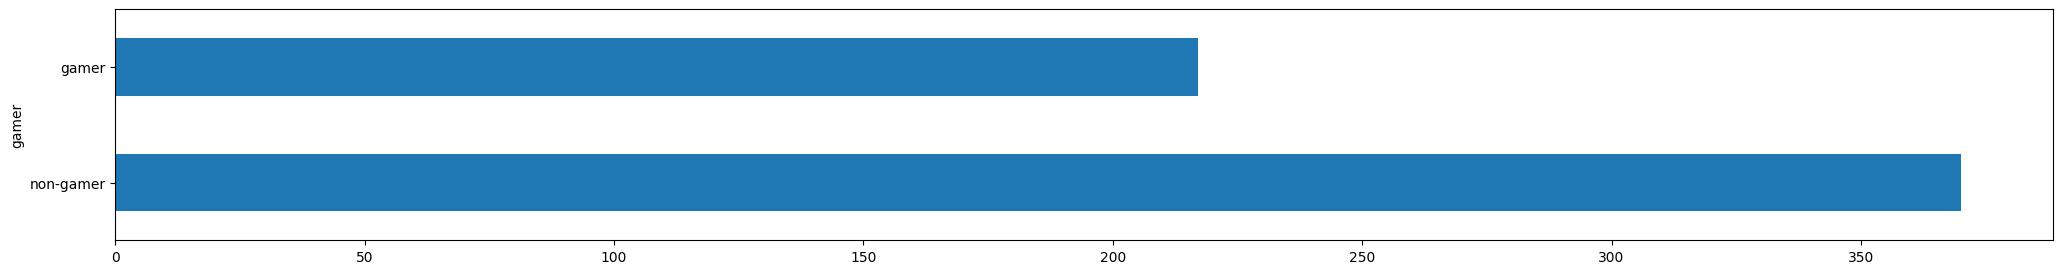

In [17]:
# plot number of videos in gamer column
# keep width and height the same
# df.plot(x='name', y='length', kind='barh', figsize=(15,3))

df['gamer'].value_counts().plot(kind='barh', figsize=(25,3))



In [18]:
gamer = df[df['gamer'] == 'gamer']
gamer['uniqueId'].value_counts()

# top 5 gamers
# presidentialdeepfakes       75
# trumposaurusrex             69
# coversdotai                 24
# soulthagenshinstan          14
# redmist2033                 12

uniqueId
presidentialdeepfakes    38
presidentfunnyai         16
trumposaurusrex          14
redmist2033              12
coversdotai              11
                         ..
sweetblasphemyband        1
theater.dreamer           1
paperfiguerstudios        1
shoujii_pop               1
seanswagy                 1
Name: count, Length: 93, dtype: int64

In [19]:
# make a new df for the top 5 gamers
top5gamers = ['presidentialdeepfakes', 'trumposaurusrex', 'coversdotai', 'soulthagenshinstan', 'redmist2033']
df_top5gamers = df[df['uniqueId'].isin(top5gamers)]
df_top5gamers.head()

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
0,7202754390540190766,presidentialdeepfakes,7205031224979508523,https://www.tiktok.com/@presidentialdeepfakes/video/7205031224979508523,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-28 2:41:05,The boys go on a late night drive to McDonalds #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming #aipresidents,2213066,26836,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
2,7202754390540190766,presidentialdeepfakes,7202981692708080939,https://www.tiktok.com/@presidentialdeepfakes/video/7202981692708080939,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 14:07:56,Trump and Biden play War Thunder #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming,490077,1789,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
3,7202754390540190766,presidentialdeepfakes,7202957780104318254,https://www.tiktok.com/@presidentialdeepfakes/video/7202957780104318254,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 12:35:11,The boys play Among Us #president #ai #biden #aibiden #trump #aitrump #amongus #aipresident,305942,2515,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
7,7202754390540190766,presidentialdeepfakes,7206027907800567083,https://www.tiktok.com/@presidentialdeepfakes/video/7206027907800567083,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-03-02 19:08:49,#aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidents,101653,797,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
9,7202754390540190766,presidentialdeepfakes,7204928708715744558,https://www.tiktok.com/@presidentialdeepfakes/video/7204928708715744558,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-27 20:03:18,The Queen clutches #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming,126879,1091,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer


In [20]:
# Rank the video with the most playCount

df_top5gamers.sort_values(by='playCount', ascending=False).head(5)

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
39,7202754390540190766,presidentialdeepfakes,7204685376160681259,https://www.tiktok.com/@presidentialdeepfakes/video/7204685376160681259,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-27 4:19:09,The boys go to WB Park #aivoice #president #ai #biden #aibiden #aitrump #trump #aipresidentgaming #aipresidents,8737588,214286,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
0,7202754390540190766,presidentialdeepfakes,7205031224979508523,https://www.tiktok.com/@presidentialdeepfakes/video/7205031224979508523,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-28 2:41:05,The boys go on a late night drive to McDonalds #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming #aipresidents,2213066,26836,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
2,7202754390540190766,presidentialdeepfakes,7202981692708080939,https://www.tiktok.com/@presidentialdeepfakes/video/7202981692708080939,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 14:07:56,Trump and Biden play War Thunder #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming,490077,1789,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
40,7202754390540190766,presidentialdeepfakes,7208999985692708142,https://www.tiktok.com/@presidentialdeepfakes/video/7208999985692708142,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-03-10 19:21:59,#aivoice #president #ai #biden #aibiden #trump #aitrump #obama #aiobama #tuckercarlson #aipresidents #aipresidents,412016,19942,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
3,7202754390540190766,presidentialdeepfakes,7202957780104318254,https://www.tiktok.com/@presidentialdeepfakes/video/7202957780104318254,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 12:35:11,The boys play Among Us #president #ai #biden #aibiden #trump #aitrump #amongus #aipresident,305942,2515,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer


<Axes: ylabel='uniqueId'>

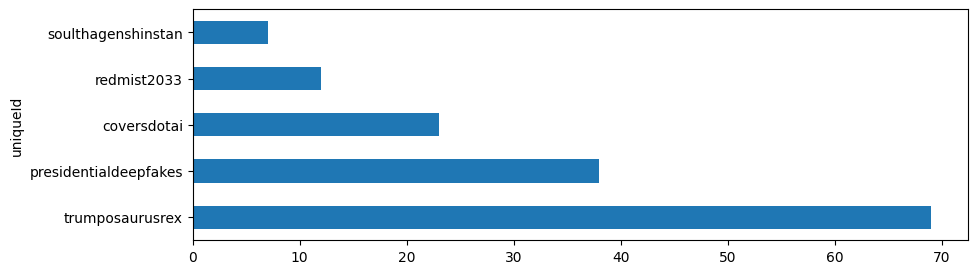

In [21]:
df_top5gamers['uniqueId'].value_counts().plot(kind='barh', figsize=(10,3))

<Axes: ylabel='followerCount'>

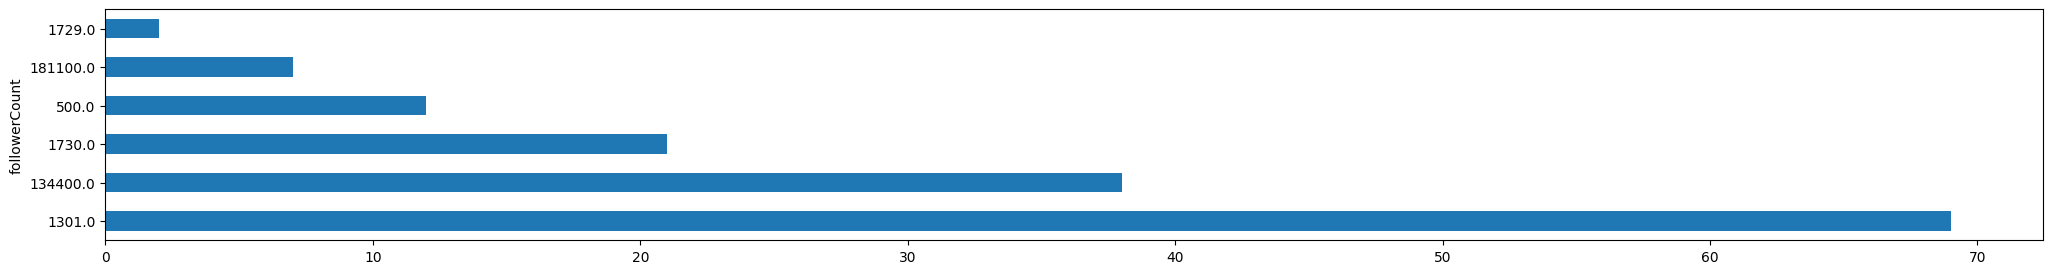

In [22]:
df_top5gamers['followerCount'].value_counts().plot(kind='barh', figsize=(25,3), x='uniqueId')




In [23]:
# show me presidentialdeepfakes
presidentialdeepfakes = df_top5gamers[df_top5gamers['uniqueId'] == 'presidentialdeepfakes']
presidentialdeepfakes.sort_values(by='playCount', ascending=False).head(5)

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
39,7202754390540190766,presidentialdeepfakes,7204685376160681259,https://www.tiktok.com/@presidentialdeepfakes/video/7204685376160681259,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-27 4:19:09,The boys go to WB Park #aivoice #president #ai #biden #aibiden #aitrump #trump #aipresidentgaming #aipresidents,8737588,214286,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
0,7202754390540190766,presidentialdeepfakes,7205031224979508523,https://www.tiktok.com/@presidentialdeepfakes/video/7205031224979508523,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-28 2:41:05,The boys go on a late night drive to McDonalds #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming #aipresidents,2213066,26836,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
2,7202754390540190766,presidentialdeepfakes,7202981692708080939,https://www.tiktok.com/@presidentialdeepfakes/video/7202981692708080939,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 14:07:56,Trump and Biden play War Thunder #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming,490077,1789,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
40,7202754390540190766,presidentialdeepfakes,7208999985692708142,https://www.tiktok.com/@presidentialdeepfakes/video/7208999985692708142,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-03-10 19:21:59,#aivoice #president #ai #biden #aibiden #trump #aitrump #obama #aiobama #tuckercarlson #aipresidents #aipresidents,412016,19942,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
3,7202754390540190766,presidentialdeepfakes,7202957780104318254,https://www.tiktok.com/@presidentialdeepfakes/video/7202957780104318254,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 12:35:11,The boys play Among Us #president #ai #biden #aibiden #trump #aitrump #amongus #aipresident,305942,2515,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer


In [24]:
# similar videos

same_content = [7270873962580544810,
7209903332079734062,
7209980940985077035,
7210934402291928325,
7213007229287468331,
7207803496018496811
]
same = gamer[gamer['videoId'].isin(same_content)]

#print link

print(same['link'])



38     https://www.tiktok.com/@presidentialdeepfakes/video/7270873962580544810
85                https://www.tiktok.com/@jojoshmodo/video/7213007229287468331
119                https://www.tiktok.com/@oneshotai/video/7209903332079734062
134              https://www.tiktok.com/@feltrinbruh/video/7210934402291928325
155       https://www.tiktok.com/@sweetblasphemyband/video/7207803496018496811
182                  https://www.tiktok.com/@a.ziooo/video/7209980940985077035
Name: link, dtype: object


### Deepfakes

In [25]:

# create a df for biden_deepfakes and psa_deepfakes

df_biden_deepfakes = df[df['biden_deepfakes'] == 'biden_deepfakes']
df_psa_deepfakes = df[df['psa_deepfakes'] == 'psa_deepfakes']

# combine the two dataframes

deepfakes = pd.concat([df_biden_deepfakes, df_psa_deepfakes], axis=0)
len(deepfakes)

143

In [26]:
# df_biden_deepfakes['uniqueId'].value_counts().plot(kind='barh', figsize=(10,3))
deepfakes['uniqueId'].value_counts().head(10)



uniqueId
talkthenews             38
aitrumporbiden          22
thatonlineaivoiceguy     7
infectedfox              4
maskedmaniacbeatz        4
powerfulsigmafreud       3
vintagekicks             3
tabithasiershatalbot     2
airforce1ent             2
kingcradi                2
Name: count, dtype: int64

In [27]:
deepfakes[deepfakes['uniqueId'] == 'youexec'].head()

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
149,6840300356640195590,youexec,7208999271104875818,https://www.tiktok.com/@youexec/video/7208999271104875818,Making Powerpoint easy.\nGet the templates👇,23100.0,False,2023-03-10 19:19:13,Meanwhile at the oval office… DISCLAIMER: AI deepfake parody #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidents,2231,2,gamer,non-biden_deepfakes,non-presidential_debates,psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
151,6840300356640195590,youexec,7211584305229778218,https://www.tiktok.com/@youexec/video/7211584305229778218,Making Powerpoint easy.\nGet the templates👇,23100.0,False,2023-03-17 18:30:24,When the boys hype up your PowerPoint presentation... DISCLAIMER: AI deepfake parody #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidents,1938,3,gamer,non-biden_deepfakes,non-presidential_debates,psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer


### Monetization: More than 10K followers

In [28]:
# videos with more than 10k followerCount

tenkfollowers = df[df['followerCount'] > 10000].sort_values(by='followerCount', ascending=False)
len(tenkfollowers)

# print(tenkfollowers['uniqueId'], tenkfollowers['playCount'])


# maskedmaniacbeatz = 236400 = (702 + 931 + 702) 
# muffet_666 = 67900 = (5086)
# iancjordan = 52400 = (390)
# feestdjmaarten = 33300 = (1768)
# randomlegovideos = 30800 = (535 + 824 + 824)
# youexec = 23100 = (2231 + 2231 + 1938 + 1938)
# australian_child_labor = 22800 = (5173)
# jonthewiggles = 22600 = 768
# kingcradi = 20200 = (204934 + 4187 + 4187)

107

In [29]:
tenkfollowers.head(10)

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
122,6815733755019691014,gcabin,7226409527770434842,https://www.tiktok.com/@gcabin/video/7226409527770434842,Biz - 📧/gcabinbiz@gmail.com\nDaily Dose of Internet Highlights🤝,1500000.0,False,2023-04-26 17:19:50,Biden’s a munch // Credit: @Real Voiceovers #biden #aibiden #jokes #sickmode #minecraft,1866,1,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
51,6735254550829237253,vampyro111,7208000084678675755,https://www.tiktok.com/@vampyro111/video/7208000084678675755,⬇️business email in twitch bio ⬇️\n‼️LIVE EVERY DAY AT 4:30PM CT‼️,1300000.0,False,2023-03-08 2:41:53,Patrick Bateman Minecraft Let’s Play Episode 1 THIS IS AN AI GENERATED VOICE #minecraft #minecraftletsplay #aivoices #aipresidents #aitrend #aibiden #funny #aimemes,17691,5,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
193,6611106514961874949,lilnubbycake,7204806201304010030,https://www.tiktok.com/@lilnubbycake/video/7204806201304010030,Video Game Videos!\nMusician \nBackup ➡️ @lilnubbycake2,672300.0,False,2023-02-27 12:07:57,I made this video using AI voice technology. @Clash of Clans #ai #coc #clashofclans #aibiden #aitrump #gaming #funny #viral,4105,3,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
128,6611106514961874949,lilnubbycake,7205044436445809963,https://www.tiktok.com/@lilnubbycake/video/7205044436445809963,Video Game Videos!\nMusician \nBackup ➡️ @lilnubbycake2,672300.0,False,2023-02-28 3:32:22,Repost because it flopped. #ai #coc #funny #aitrump #aibiden #fyp,4676,3,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
315,7120906870907601962,rahlolz,7228555798220197163,https://www.tiktok.com/@rahlolz/video/7228555798220197163,👇Join my Group!👇,504600.0,False,2023-05-02 12:08:49,AI presidents guess the Roblox Characters IB: @KreekCraft #roblox #presidentaivoice #robloxedit #rahlolz #robloxx #aitrump #aipresidents,12665,10,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
316,7078728145045685294,icyhallow,7296991080069811499,https://www.tiktok.com/@icyhallow/video/7296991080069811499,indepedent\n21 years old\nsnapchat: icyhallow\nmusic & more ⬇️,358800.0,False,2023-11-02 22:12:24,Replying to @greyson #fyp #icyhallow #freestyle #autotune #aitrump,8646,0,non-gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,unknown
52,7077693240081859626,thetttvpodcast,7265637965118983470,https://www.tiktok.com/@thetttvpodcast/video/7265637965118983470,Join us as we explore everything at the bottom of the rabbit hole. Enjoy ur TTTV,249800.0,False,2023-08-10 10:27:01,🌐A.I. Taking Over Twitch - A.I. Trump and Biden Live Debate 24/7🤖 #ai #twitch #aitrump #aibiden #debate #toilettimeshow #longervideos,9281,105,non-gamer,non-biden_deepfakes,presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,presidential_debates
199,7084650443007853611,maskedmaniacbeatz,7274401921119653166,https://www.tiktok.com/@maskedmaniacbeatz/video/7274401921119653166,"Musician, rapper, 80’s music lover \n⬇️Click the link to hear full 80’s remix⬇️",236400.0,False,2023-09-03 1:14:50,Im 💀 with these Ai’s! #aigettingtooreal #ai #aibiden #aitrend #aivocal #bidenai #dirtyrap,702,1,non-gamer,biden_deepfakes,non-presidential_debates,psa_deepfakes,non-vietnamese_trump,no

### Most Plays

In [30]:
df.sort_values(by='playCount', ascending=False).head(5)

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
39,7202754390540190766,presidentialdeepfakes,7204685376160681259,https://www.tiktok.com/@presidentialdeepfakes/video/7204685376160681259,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-27 4:19:09,The boys go to WB Park #aivoice #president #ai #biden #aibiden #aitrump #trump #aipresidentgaming #aipresidents,8737588,214286,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
0,7202754390540190766,presidentialdeepfakes,7205031224979508523,https://www.tiktok.com/@presidentialdeepfakes/video/7205031224979508523,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-28 2:41:05,The boys go on a late night drive to McDonalds #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming #aipresidents,2213066,26836,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
292,6799121884106458118,shadowboi36,7201797109341867306,https://www.tiktok.com/@shadowboi36/video/7201797109341867306,19\nDiscord link:,30600.0,False,2023-02-19 9:32:26,Had to let the presidents play my favorite game #roblox #robloxgame #robloxmilitary #military #plane #robloxplane #edit #fyp #president #aitrump #aivoice #ai,1369539,10423,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
305,6799121884106458118,shadowboi36,7202009771153657134,https://www.tiktok.com/@shadowboi36/video/7202009771153657134,19\nDiscord link:,30600.0,False,2023-02-19 23:16:21,I hope y’all get the kunduz reference #roblox #robloxgame #robloxmilitary #military #plane #robloxplane #edit #fyp #aitrump #president #aipresident #aivoice #ai,1028391,7280,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
1,6927014834434212869,covers.ai.songs,7251711953343696170,https://www.tiktok.com/@covers.ai.songs/video/7251711953343696170,"covers.ai fan acount, teen pop sensation and next best song producer 😤😤",7875.0,False,2023-07-03 21:46:11,"hello christ, im bout to sin again! #trump #aitrump #aicover #aicovers #biden #aibiden #flyanaboss #flyanabossyouwish",913053,41761,non-gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,trump_cover,non-biden_cover,non-trump_deepfake,trump_covers


### Played when?

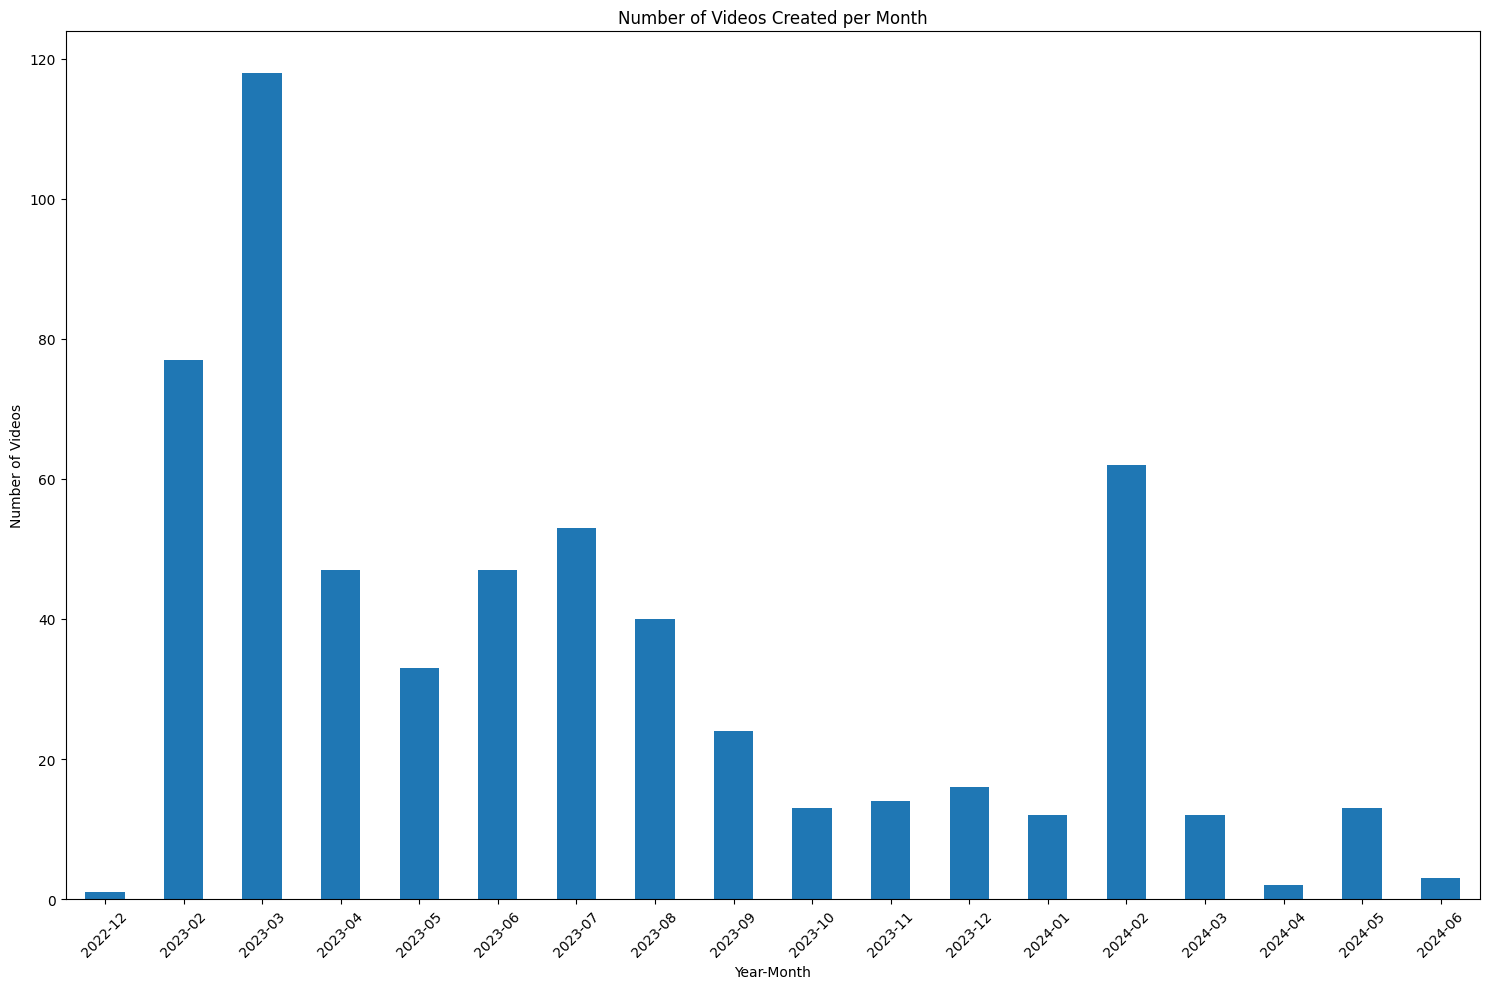

In [31]:
# Convert 'createTime' to datetime if it's not already
df['createTime'] = pd.to_datetime(df['createTime'])

# Extract year and month, and create a new column
df['year_month'] = df['createTime'].dt.to_period('M')

# Count the number of videos per year-month
video_counts = df['year_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 10))
video_counts.plot(kind='bar')

# Customize the plot
plt.title('Number of Videos Created per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
video_counts

year_month
2022-12      1
2023-02     77
2023-03    118
2023-04     47
2023-05     33
2023-06     47
2023-07     53
2023-08     40
2023-09     24
2023-10     13
2023-11     14
2023-12     16
2024-01     12
2024-02     62
2024-03     12
2024-04      2
2024-05     13
2024-06      3
Freq: M, Name: count, dtype: int64

In [33]:
# show videos created in February 2024

# df.sort_values(by='createTime', ascending=True)
# Filter for February 2024
feb_2024_videos = df[df['createTime'].dt.to_period('M') == '2024-02']
feb_2024_videos

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,...,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category,year_month
126,6566710182079070213,deathmetaldave1134,7335993513949007146,https://www.tiktok.com/@deathmetaldave1134/video/7335993513949007146,"Due to SPAM, I will not respond to PMs until I know your account is legit.",1118.0,False,2024-02-16 00:41:52,#aitrump #aibiden #aibillieeilish #presidentaldebate #trump #biden #obama,542,...,non-gamer,biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,biden_deepfakes,2024-02
195,7010605879486383110,digisback,7340713918005824810,https://www.tiktok.com/@digisback/video/7340713918005824810,telegram DANK DABS no scam only TDs. I'm a cannabis connoisseur/ concentrate,1219.0,False,2024-02-28 17:59:56,#duet with @toby phillips808 #Stitch #taylorswift #viral #viraltiktok #trending #aibiden,382,...,non-gamer,biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,biden_deepfakes,2024-02
270,6935646668315264006,jj_howler,7337606213053730094,https://www.tiktok.com/@jj_howler/video/7337606213053730094,YouTube is JJ_HOWLER Twitter is JJ_HOWLER,342.0,False,2024-02-20 09:01:20,Fortnite AI trump VS biden in box fights. Full video on my YT channel! JJ_HOWLER #AI #trump #biden #fortnite #boxfights #aitrump #aibiden,300,...,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer,2024-02
358,7202746627580478507,trumposaurusrex,7335961956207054123,https://www.tiktok.com/@trumposaurusrex/video/7335961956207054123,AI generated Trump gallery,1301.0,True,2024-02-15 22:39:26,"Your favorite Spartan Warrior President during the Battle of Thermopylae, obviously making Sparta great again #makespartagreatagain #donaldtrumpspaceforce #trump #trump2024 #trumptrain #trumpmemes #trumpsupporters #donaldtrump #trumptower #presidenttrump #trumposaurusrex #trumposaurus #trumposaur #aigeneratedart #aiart #aiartcommunity #aiartwork #aigeneratedmemes #aigeneratedartwork #aigeneratedimages #aitrumpart #aitrump #obama #barackobama #obamafoundation #michelleobama #makeamericagreatagain #battleofthermopylae #spartanwarrior #spartanwarriorchallenge #spartanwarriortraining",1052,...,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,NaN,gamer,2024-02
363,7202746627580478507,trumposaurusrex,7331933301885652267,https://www.tiktok.com/@trumposaurusrex/video/7331933301885652267,AI generated Trump gallery,1301.0,True,2024-02-05 02:06:13,"Beyond the mists of time, Donald the Barbarian is Chained to the perpetual Wheel of Pain, the helpless boy grows into a man, and after years of rigorous training as a fierce gladiator, Donald, now an unstoppable mountain of muscle, teams up with Vivek Ramaswamy, the American entrepreneur and politician. Together they embark on a peril-laden journey to the mysterious Mountain of Power, and the impregnable Moloch Cult Temple. #donaldtrumpspaceforce #trump #trump2024 #trumptrain #trumpmemes #trumpsupporters #donaldtrump #trumptower #presidenttrump #trumposaurusrex #trumposaurus #trumposaur #aigeneratedart #aiart #aigeneratedmemes #aigeneratedartwork #aitrumpart #aitrump #obama #barackobama #obamafoundation #michelleobama #makeamericagreatagain #donaldthebarbarian #vivekramaswamy #conanthebarbarian #conanthecimmerian #conanthedestroyer #trumpthebarbarian #hillaryclinton",506,...,non-gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,trump_deepfake,unknown,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,7202746627580478507,trumposaurusrex,7331417415529565483,http

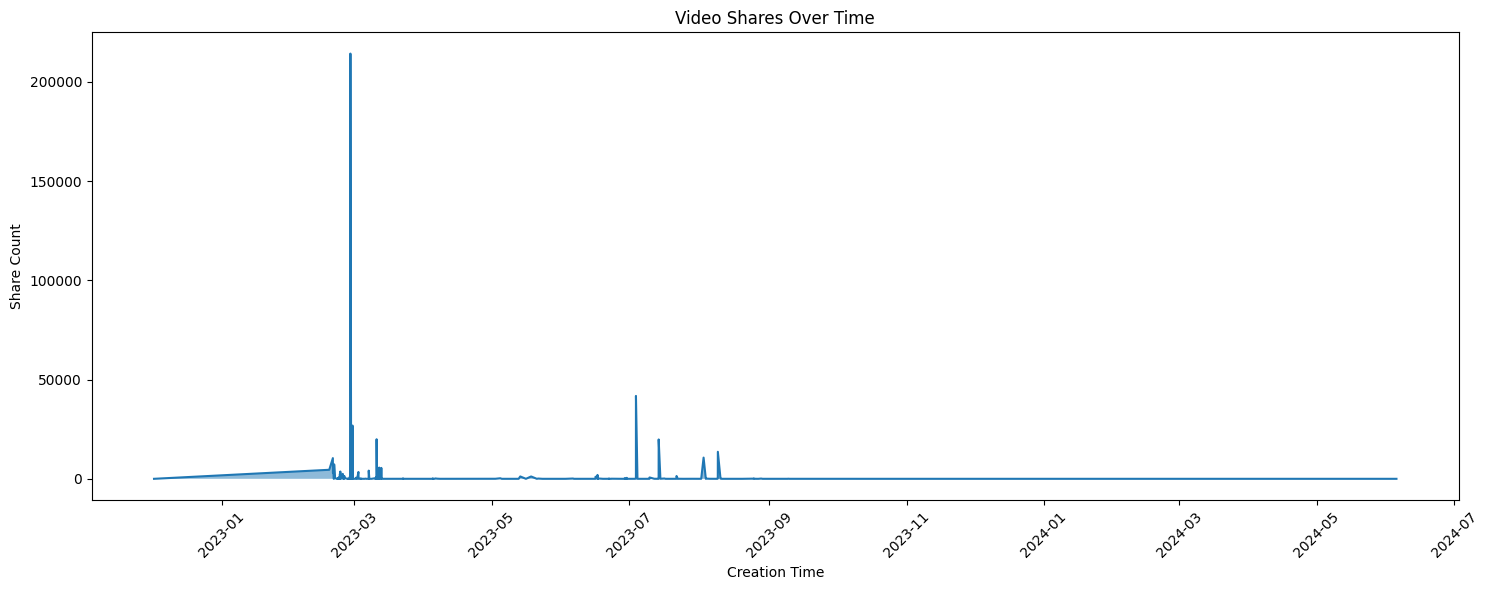

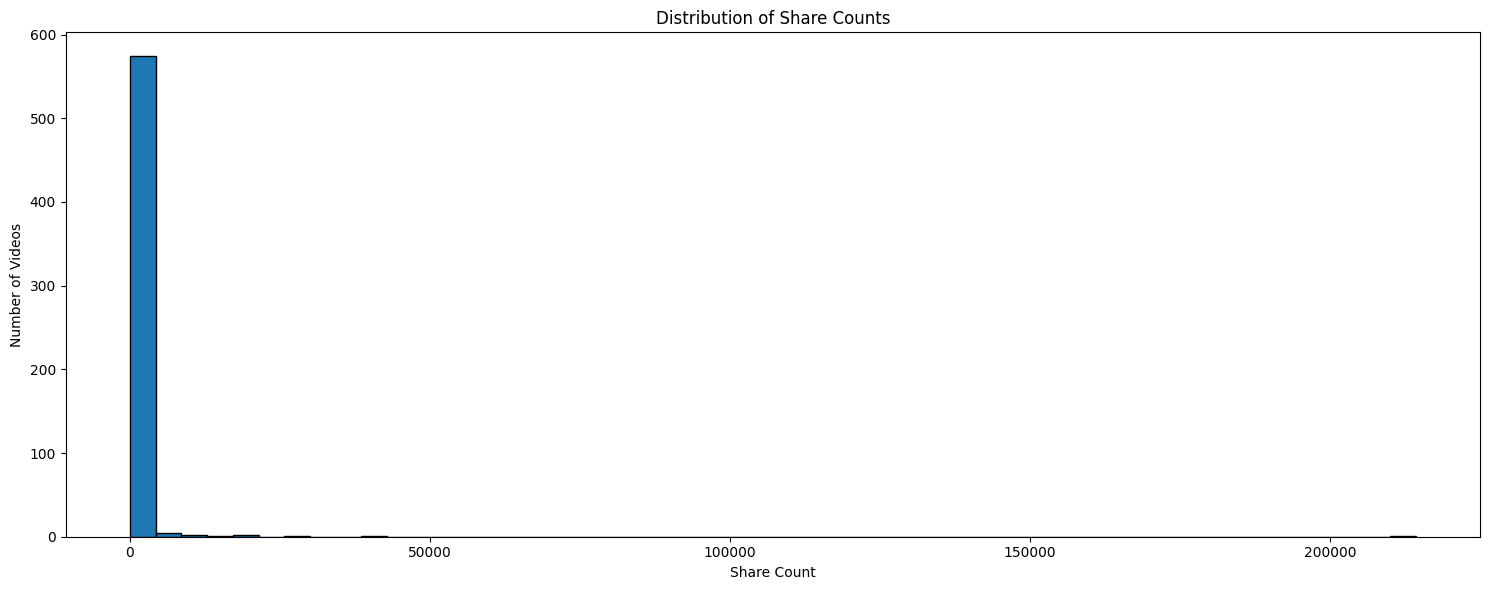

count       587.000000
mean        743.192504
std        9191.665706
min           0.000000
25%           0.000000
50%           2.000000
75%          14.000000
max      214286.000000
Name: shareCount, dtype: float64

Top 10 most shared videos:
         createTime  shareCount
2023-02-27 04:19:09      214286
2023-07-03 21:46:11       41761
2023-02-28 02:41:05       26836
2023-03-10 19:21:59       19942
2023-07-13 23:52:10       19832
2023-08-09 06:13:53       13618
2023-08-02 22:13:22       10689
2023-02-19 09:32:26       10423
2023-02-19 23:16:21        7280
2023-03-11 23:05:50        5649


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df' and has columns 'createTime' and 'shareCount'

# Convert 'createTime' to datetime if it's not already
df['createTime'] = pd.to_datetime(df['createTime'])

# Sort the DataFrame by createTime
df_sorted = df.sort_values('createTime')

# Area Chart
plt.figure(figsize=(15, 6))
plt.fill_between(df_sorted['createTime'], df_sorted['shareCount'], alpha=0.5)
plt.plot(df_sorted['createTime'], df_sorted['shareCount'])
plt.title('Video Shares Over Time')
plt.xlabel('Creation Time')
plt.ylabel('Share Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(15, 6))
plt.hist(df['shareCount'], bins=50, edgecolor='black')
plt.title('Distribution of Share Counts')
plt.xlabel('Share Count')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

# Print some statistics
print(df['shareCount'].describe())

# Print top 10 most shared videos
top_shared = df.nlargest(10, 'shareCount')[['createTime', 'shareCount']]
print("\nTop 10 most shared videos:")
print(top_shared.to_string(index=False))

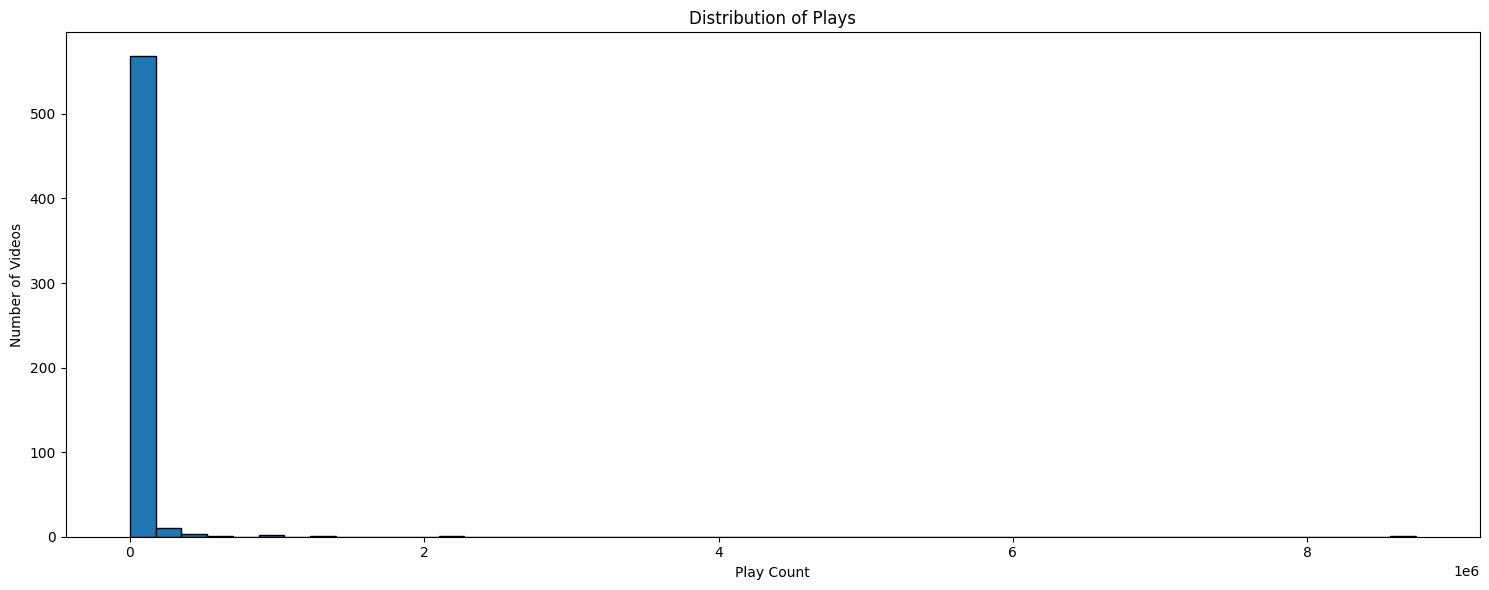

count    5.870000e+02
mean     3.786252e+04
std      3.828674e+05
min      0.000000e+00
25%      3.195000e+02
50%      6.480000e+02
75%      2.718500e+03
max      8.737588e+06
Name: playCount, dtype: float64


In [35]:
# Distribution of plays
plt.figure(figsize=(15, 6))
plt.hist(df['playCount'], bins=50, edgecolor='black')
plt.title('Distribution of Plays')
plt.xlabel('Play Count')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

# Print some statistics
print(df['playCount'].describe())



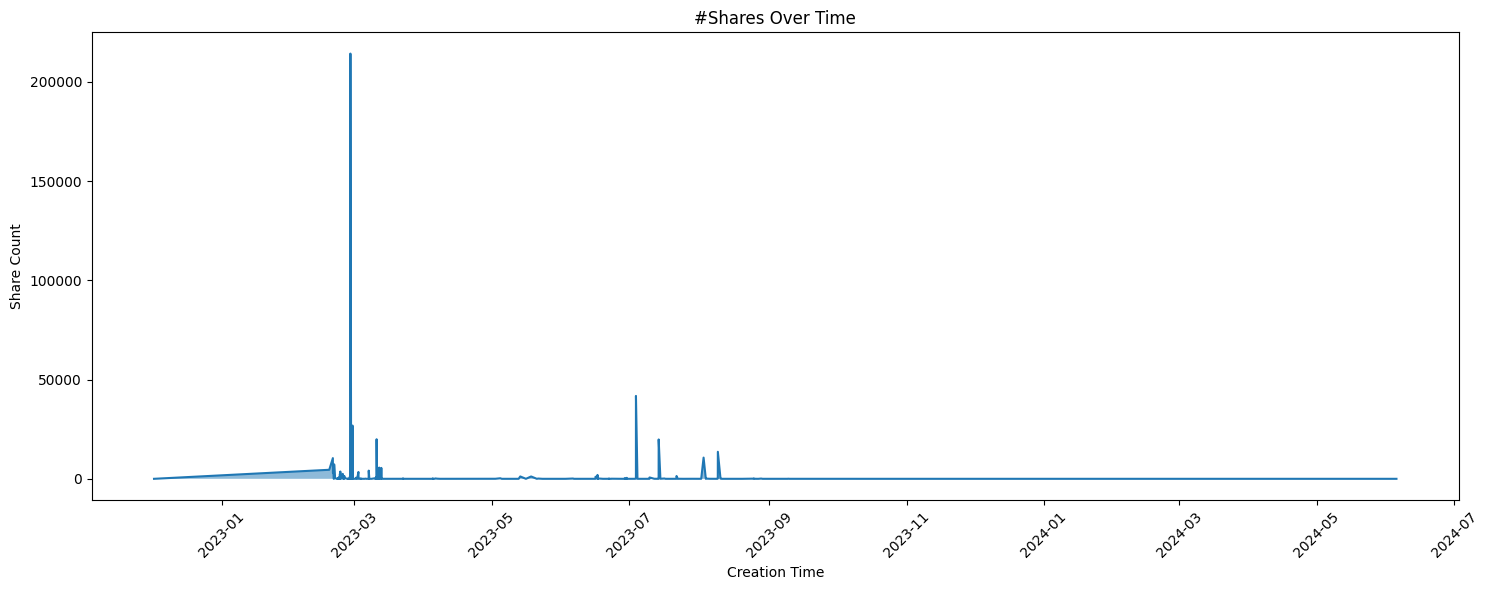

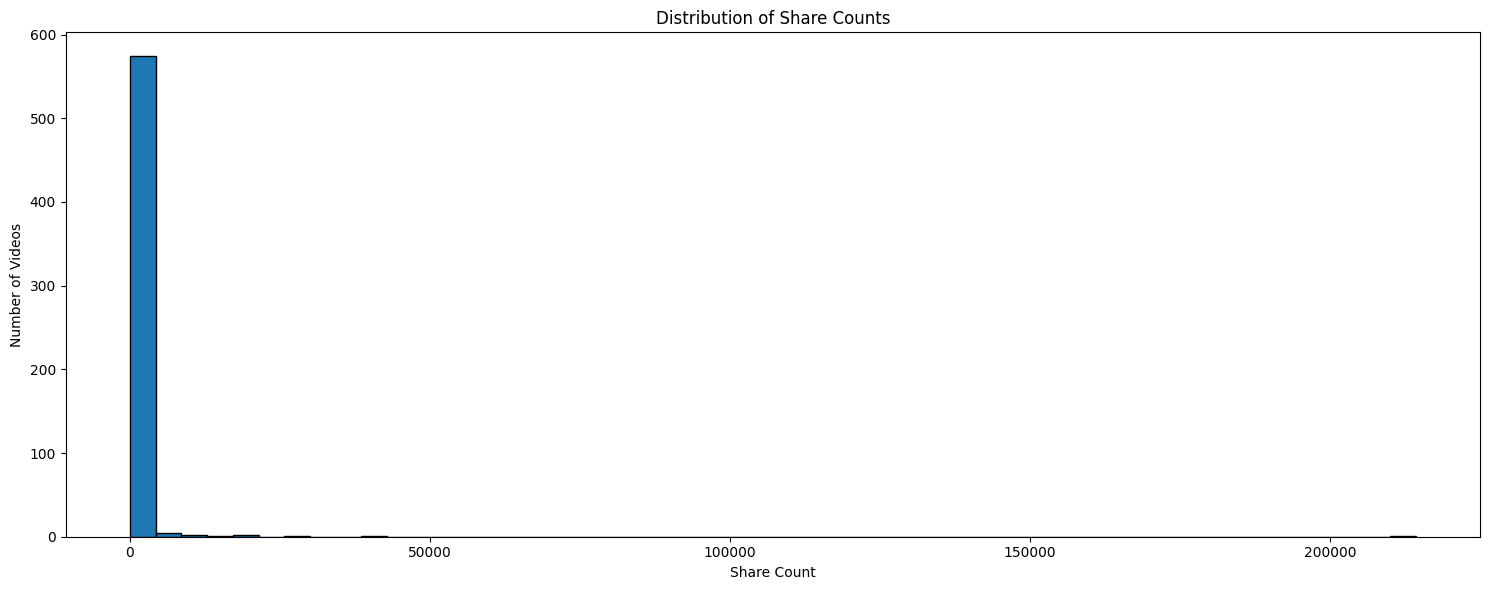

count       587.000000
mean        743.192504
std        9191.665706
min           0.000000
25%           0.000000
50%           2.000000
75%          14.000000
max      214286.000000
Name: shareCount, dtype: float64

Top 10 most shared videos:
         createTime  shareCount
2023-02-27 04:19:09      214286
2023-07-03 21:46:11       41761
2023-02-28 02:41:05       26836
2023-03-10 19:21:59       19942
2023-07-13 23:52:10       19832
2023-08-09 06:13:53       13618
2023-08-02 22:13:22       10689
2023-02-19 09:32:26       10423
2023-02-19 23:16:21        7280
2023-03-11 23:05:50        5649


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df' and has columns 'createTime' and 'shareCount'

# Convert 'createTime' to datetime if it's not already
df['createTime'] = pd.to_datetime(df['createTime'])

# Sort the DataFrame by createTime
df_sorted = df.sort_values('createTime')

# Area Chart
plt.figure(figsize=(15, 6))
plt.fill_between(df_sorted['createTime'], df_sorted['shareCount'], alpha=0.5)
plt.plot(df_sorted['createTime'], df_sorted['shareCount'])
plt.title('#Shares Over Time')
plt.xlabel('Creation Time')
plt.ylabel('Share Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(15, 6))
plt.hist(df['shareCount'], bins=50, edgecolor='black')
plt.title('Distribution of Share Counts')
plt.xlabel('Share Count')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

# Print some statistics
print(df['shareCount'].describe())

# Print top 10 most shared videos
top_shared = df.nlargest(10, 'shareCount')[['createTime', 'shareCount']]
print("\nTop 10 most shared videos:")
print(top_shared.to_string(index=False))

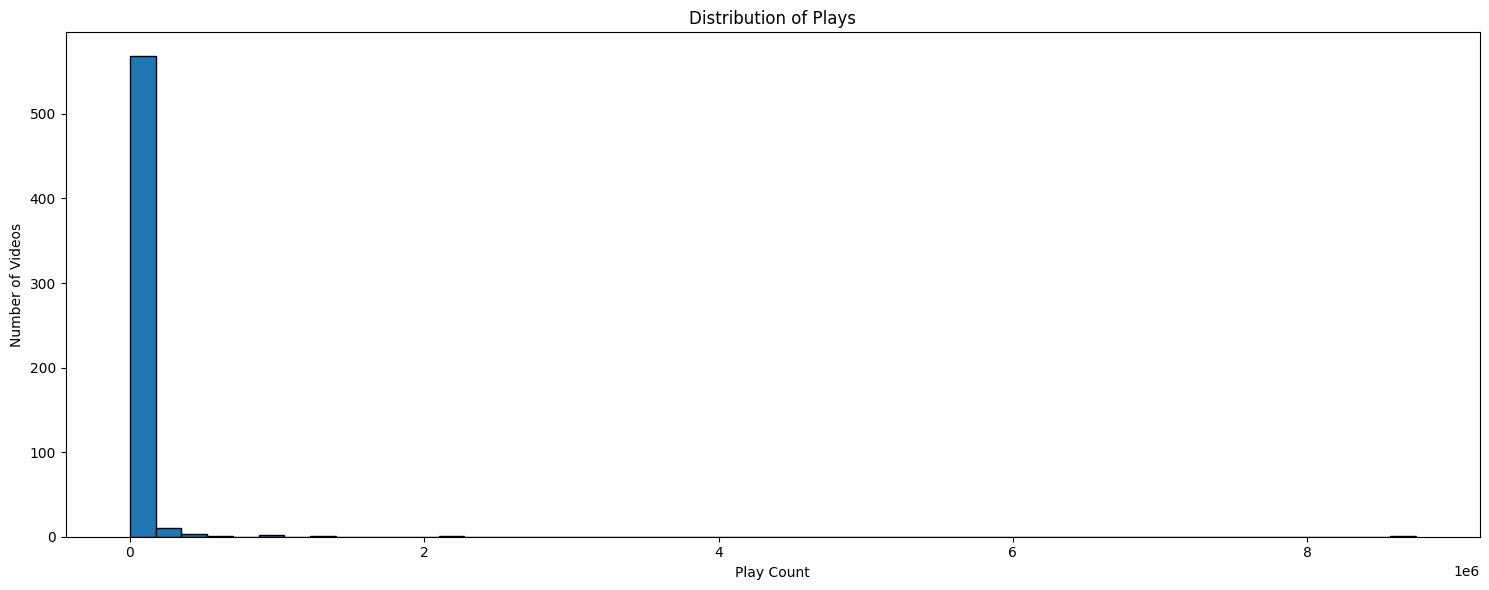

count    5.870000e+02
mean     3.786252e+04
std      3.828674e+05
min      0.000000e+00
25%      3.195000e+02
50%      6.480000e+02
75%      2.718500e+03
max      8.737588e+06
Name: playCount, dtype: float64


In [39]:
# Distribution of plays
plt.figure(figsize=(15, 6))
plt.hist(df['playCount'], bins=50, edgecolor='black')
plt.title('Distribution of Plays')
plt.xlabel('Play Count')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

# Print some statistics
print(df['playCount'].describe())

